Коефіцієнти моделі:
Intercept: 0.574541070404166
Coefficients: [ 9.98777352  5.07732809 -1.92274428]
Середньоквадратична помилка: 94.40298487333641


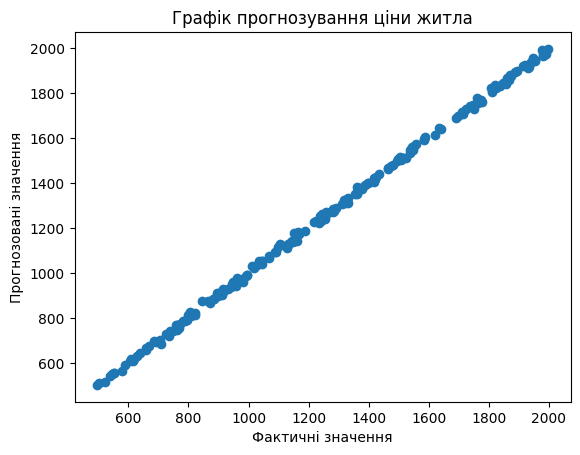

In [1]:
# Імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Крок 1: Генерація даних

# Згенеруємо дані для ознаки "Площа житла" в діапазоні від 50 до 200 кв. м.
living_area = np.random.uniform(50, 200, 1000)

# Згенеруємо дані для ознаки "Кількість спалень" в діапазоні від 1 до 5
num_bedrooms = np.random.randint(1, 6, 1000)

# Згенеруємо дані для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км
distance_to_center = np.random.uniform(1, 20, 1000)

# Згенеруємо цільову змінну - ціну житла
# Модель ціни: ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка
# Похибка генерується випадковим шумом
price = 10 * living_area + 5 * num_bedrooms - 2 * distance_to_center + np.random.normal(scale=10, size=1000)

# Створимо DataFrame зі згенерованими даними
data = pd.DataFrame({'Living_Area': living_area, 'Num_Bedrooms': num_bedrooms, 'Distance_to_Center': distance_to_center, 'Price': price})

# Крок 2: Розділіть дані на тренувальний та тестовий набори

# Визначимо ознаки (X) та цільову змінну (y)
X = data[['Living_Area', 'Num_Bedrooms', 'Distance_to_Center']]
y = data['Price']

# Розділімо дані на тренувальний та тестовий набори у співвідношенні 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Крок 3: Побудова моделі регресії

# Ініціалізуємо модель лінійної регресії
model = LinearRegression()

# Тренуємо модель на тренувальному наборі
model.fit(X_train, y_train)

# Крок 4: Оцінка моделі

# Здійснюємо прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Розраховуємо середньоквадратичну помилку
mse = mean_squared_error(y_test, y_pred)

# Виводимо коефіцієнти моделі
print('Коефіцієнти моделі:')
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Виводимо середньоквадратичну помилку
print('Середньоквадратична помилка:', mse)

# Крок 5: Візуалізація результатів

# Виводимо графік прогнозованих та фактичних значень
plt.scatter(y_test, y_pred)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Графік прогнозування ціни житла')
plt.show()
